# Assignment

### Ans1)

Let's use conditional probability to solve this problem. 

Let's define the following events:
- A: An employee is a smoker.
- B: An employee uses the company's health insurance plan.

We are given:
- P(B) = 0.70 (probability that an employee uses the health insurance plan)
- P(A|B) = 0.40 (probability that an employee is a smoker given that they use the health insurance plan)

We want to find:
- P(A|B) = ? (probability that an employee is a smoker given that they use the health insurance plan)

We can use the formula for conditional probability:
\[ P(A|B) = \frac{P(A \cap B)}{P(B)} \]

Given that P(A|B) = 0.40 and P(B) = 0.70, we can rearrange the formula to solve for P(A ∩ B):
\[ P(A \cap B) = P(A|B) \times P(B) \]
\[ P(A \cap B) = 0.40 \times 0.70 \]
\[ P(A \cap B) = 0.28 \]

So, the probability that an employee is a smoker given that they use the health insurance plan is 0.28 or 28%.

### Ans2)

Both Bernoulli Naive Bayes and Multinomial Naive Bayes are variants of the Naive Bayes algorithm used for classification tasks, particularly in natural language processing and text classification. They are both based on the Bayes' theorem and assume that features are conditionally independent given the class. However, they differ in their assumptions about the distribution of features and how they handle feature presence/absence.

1. **Bernoulli Naive Bayes:**
   - **Feature Assumption:** Bernoulli Naive Bayes assumes that each feature is binary (0 or 1), representing the presence or absence of a particular term in the input data.
   - **Use Case:** It is commonly used for text classification tasks where the presence or absence of certain words in a document is important. For example, sentiment analysis where the presence of specific words indicates positive or negative sentiment.
   - **Example:** If we're classifying emails as spam or not spam, each feature (word) is treated as binary (present or absent) in the email.

2. **Multinomial Naive Bayes:**
   - **Feature Assumption:** Multinomial Naive Bayes assumes that features represent counts or frequencies of events. It's often used with data where each feature is a non-negative integer count, such as word frequencies in a document.
   - **Use Case:** It's widely used in text classification, such as document categorization or topic classification, where the frequency of words matters.
   - **Example:** If we're classifying news articles into different categories, each feature could represent the frequency of a word in the article.

In both cases, the Naive Bayes assumption of feature independence (given the class) simplifies calculations, but it might not always hold in practice. Despite this simplification, Naive Bayes models often perform surprisingly well, especially on text data, due to their simplicity and efficiency.

It's important to choose the appropriate variant based on the nature of your data and the problem you're trying to solve. If your features are binary (presence/absence) like in text sentiment analysis, Bernoulli Naive Bayes might be more suitable. If your features are counts or frequencies, as often seen in text classification tasks involving word frequencies, Multinomial Naive Bayes could be a better choice.

### Ans3)

Bernoulli Naive Bayes is specifically designed for binary data, where each feature is either present (1) or absent (0). When it comes to missing values in the context of Bernoulli Naive Bayes, there are a few different approaches you can consider:

1. **Ignore Instances with Missing Values:**
   One simple approach is to ignore instances (data points) that have missing values in any of the features. This means that if a feature's value is missing (undefined), you exclude that instance from your analysis. However, this approach can result in a loss of valuable data, especially if a significant number of instances have missing values.

2. **Impute Missing Values:**
   If you want to retain instances with missing values, you might consider imputing the missing values with either 0 or 1 based on certain assumptions. For example, if the missing value represents a feature that you believe should have been present, you might impute it as 1. If you believe it should have been absent, you might impute it as 0. This approach introduces some subjectivity and assumptions.

3. **Treat Missing Values as a Separate Category:**
   You could treat missing values as a separate category or state for each feature. In this case, you would include a separate category (e.g., "missing") in addition to the usual 0 and 1 values for each feature. This allows the model to learn how missing values relate to the target variable independently.

4. **Use Advanced Imputation Techniques:**
   Depending on the nature of your data, you might choose to use more advanced imputation techniques, such as mean imputation, mode imputation, or even more sophisticated techniques like k-nearest neighbors imputation. These techniques could be applied before using Bernoulli Naive Bayes, but they might introduce complexities and could affect the naive assumption of feature independence.


### Ans4)

Yes, Gaussian Naive Bayes can indeed be used for multi-class classification. Gaussian Naive Bayes is a variant of the Naive Bayes algorithm that assumes the features in your data follow a Gaussian (normal) distribution. It's well-suited for continuous data, and it's commonly used in cases where the features are real-valued and assumed to be normally distributed within each class.

For multi-class classification using Gaussian Naive Bayes, the algorithm is extended to handle more than two classes. Each class's distribution is assumed to follow a Gaussian distribution, and the algorithm calculates the likelihood of an instance belonging to each class based on the Gaussian distribution parameters (mean and variance) of each class's features. The class with the highest likelihood is predicted as the output class for the given instance.

### Ans5)

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('spambase.data')
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.41,0.42,0.43,0.778,0.44,0.45,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
X= df.iloc[:,:-1].values
y= df.iloc[:, -1].values

In [5]:
bernoulli_nb = BernoulliNB()
multinomial_nb = MultinomialNB()
gaussian_nb = GaussianNB()

## Bernouli NB Classifier

In [6]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, f1_score
scoring = ['precision_macro', 'recall_macro','accuracy','f1']
scores = cross_validate(bernoulli_nb, X, y, scoring=scoring, cv=10)

In [7]:
for i in range(0,10):
    print(f"Accuracy of the fold{i+1}: {scores['test_accuracy'][i]}")
print(f"Average Accuracy across all folds: {np.mean(scores['test_accuracy'])}")
print("----------------------------------------------------------------------")

for i in range(0,10):
    print(f"Precision of fold {i+1}: {scores['test_precision_macro'][i]}")
print(f"Avarage Precision across all folds: {np.mean(scores['test_precision_macro'])}")
print("-------------------------------------------------------------------------------")

for i in range(0,10):
    print(f"Recall of fold {i+1}: {scores['test_recall_macro'][i]}")
print(f"Avarage recall across all folds: {np.mean(scores['test_recall_macro'])}")
print("-------------------------------------------------------------------------------")

for i in range(0,10):
    print(f"F1 score of fold {i+1}: {scores['test_f1'][i]}")
print(f"Avarage f1 score across all folds: {np.mean(scores['test_f1'])}")
print("-------------------------------------------------------------------------------")


Accuracy of the fold1: 0.8847826086956522
Accuracy of the fold2: 0.9152173913043479
Accuracy of the fold3: 0.9021739130434783
Accuracy of the fold4: 0.908695652173913
Accuracy of the fold5: 0.8913043478260869
Accuracy of the fold6: 0.9282608695652174
Accuracy of the fold7: 0.9260869565217391
Accuracy of the fold8: 0.8913043478260869
Accuracy of the fold9: 0.808695652173913
Accuracy of the fold10: 0.782608695652174
Average Accuracy across all folds: 0.8839130434782609
----------------------------------------------------------------------
Precision of fold 1: 0.8973111202227066
Precision of fold 2: 0.9158117323296708
Precision of fold 3: 0.9153763440860215
Precision of fold 4: 0.9114535182331793
Precision of fold 5: 0.892552645095018
Precision of fold 6: 0.9259502749223045
Precision of fold 7: 0.9316890789283427
Precision of fold 8: 0.8989952406134321
Precision of fold 9: 0.7994194484760523
Precision of fold 10: 0.7721867321867322
Avarage Precision across all folds: 0.886074613509346
---

## Gaussin NB Clasifier

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, f1_score
scoring = ['precision_macro', 'recall_macro','accuracy','f1']
scores = cross_validate(gaussian_nb, X, y, scoring=scoring, cv=10)

In [9]:
for i in range(0,10):
    print(f"Accuracy of the fold{i+1}: {scores['test_accuracy'][i]}")
print(f"Average Accuracy across all folds: {np.mean(scores['test_accuracy'])}")
print("----------------------------------------------------------------------")

for i in range(0,10):
    print(f"Precision of fold {i+1}: {scores['test_precision_macro'][i]}")
print(f"Avarage Precision across all folds: {np.mean(scores['test_precision_macro'])}")
print("-------------------------------------------------------------------------------")

for i in range(0,10):
    print(f"Recall of fold {i+1}: {scores['test_recall_macro'][i]}")
print(f"Avarage recall across all folds: {np.mean(scores['test_recall_macro'])}")
print("-------------------------------------------------------------------------------")

for i in range(0,10):
    print(f"F1 score of fold {i+1}: {scores['test_f1'][i]}")
print(f"Avarage f1 score across all folds: {np.mean(scores['test_f1'])}")
print("-------------------------------------------------------------------------------")


Accuracy of the fold1: 0.8434782608695652
Accuracy of the fold2: 0.8630434782608696
Accuracy of the fold3: 0.8782608695652174
Accuracy of the fold4: 0.8673913043478261
Accuracy of the fold5: 0.8847826086956522
Accuracy of the fold6: 0.8282608695652174
Accuracy of the fold7: 0.8326086956521739
Accuracy of the fold8: 0.8673913043478261
Accuracy of the fold9: 0.6347826086956522
Accuracy of the fold10: 0.717391304347826
Average Accuracy across all folds: 0.8217391304347826
----------------------------------------------------------------------
Precision of fold 1: 0.8486742424242424
Precision of fold 2: 0.8665588162948668
Precision of fold 3: 0.8778048734380612
Precision of fold 4: 0.8704222154963681
Precision of fold 5: 0.8792075070283414
Precision of fold 6: 0.8447074142156863
Precision of fold 7: 0.8430462568472307
Precision of fold 8: 0.8634469696969698
Precision of fold 9: 0.7185854544618426
Precision of fold 10: 0.7424239475271999
Avarage Precision across all folds: 0.8354877697430808

## Multinomial NB Classifier

In [10]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, f1_score
scoring = ['precision_macro', 'recall_macro','accuracy','f1']
scores = cross_validate(multinomial_nb, X, y, scoring=scoring, cv=10)

In [11]:
for i in range(0,10):
    print(f"Accuracy of the fold{i+1}: {scores['test_accuracy'][i]}")
print(f"Average Accuracy across all folds: {np.mean(scores['test_accuracy'])}")
print("----------------------------------------------------------------------")

for i in range(0,10):
    print(f"Precision of fold {i+1}: {scores['test_precision_macro'][i]}")
print(f"Avarage Precision across all folds: {np.mean(scores['test_precision_macro'])}")
print("-------------------------------------------------------------------------------")

for i in range(0,10):
    print(f"Recall of fold {i+1}: {scores['test_recall_macro'][i]}")
print(f"Avarage recall across all folds: {np.mean(scores['test_recall_macro'])}")
print("-------------------------------------------------------------------------------")

for i in range(0,10):
    print(f"F1 score of fold {i+1}: {scores['test_f1'][i]}")
print(f"Avarage f1 score across all folds: {np.mean(scores['test_f1'])}")
print("-------------------------------------------------------------------------------")


Accuracy of the fold1: 0.7913043478260869
Accuracy of the fold2: 0.7891304347826087
Accuracy of the fold3: 0.8108695652173913
Accuracy of the fold4: 0.8347826086956521
Accuracy of the fold5: 0.8282608695652174
Accuracy of the fold6: 0.7782608695652173
Accuracy of the fold7: 0.7782608695652173
Accuracy of the fold8: 0.8130434782608695
Accuracy of the fold9: 0.6934782608695652
Accuracy of the fold10: 0.7434782608695653
Average Accuracy across all folds: 0.786086956521739
----------------------------------------------------------------------
Precision of fold 1: 0.7842799770510613
Precision of fold 2: 0.784690252464737
Precision of fold 3: 0.8042645140247879
Precision of fold 4: 0.8276337066538899
Precision of fold 5: 0.8230185909980431
Precision of fold 6: 0.7678085051392671
Precision of fold 7: 0.7676658476658477
Precision of fold 8: 0.8081634339303051
Precision of fold 9: 0.6963907384987893
Precision of fold 10: 0.7314987714987715
Avarage Precision across all folds: 0.77954143379255
--

### Discuss about the results

- Comparing the average f1 score across all the folds we can say that Bernoulli Naive Bayes Classifer has the best performence on the data

In [12]:
##splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
bernoulli_nb.fit(x_train,y_train)

BernoulliNB()

In [15]:
y_preds = bernoulli_nb.predict(x_test)

In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       530
           1       0.89      0.79      0.84       390

    accuracy                           0.87       920
   macro avg       0.88      0.86      0.87       920
weighted avg       0.87      0.87      0.87       920



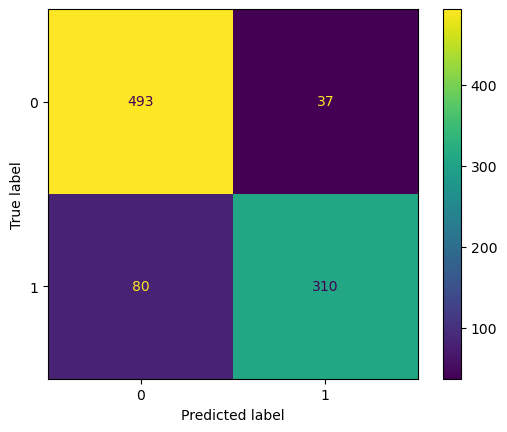

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_preds, labels=bernoulli_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=bernoulli_nb.classes_)
disp.plot()

plt.show()

## Summary of confusion matrix

- The confusion matrix indicates that the model has correctly predicted the majority of instances for both classes, with a higher accuracy in predicting class 1. But it has made some incorrect predictions, with a higher number of false negatives for class 0 and false positives for class 1.

## Suggestion for future work

We can improve this data with more impletation like we can

- Perform hyperparameter tuning 
- We can use Random forest Classifier or XGBoost
- Implement ensemble techiniques